# Customer Churn Prediction

![alt text](/Users/adair/Desktop/coding/MACS30100/customer-churn-prediction-2020/WechatIMG151.png)

## Introduction(Chunyang Zhang)

### Task:
This task is about using the 19 input features to predict whether a customer will change telecommunications provider, something known as "churning".


### Data:
Original Dataset: https://www.kaggle.com/competitions/customer-churn-prediction-2020/overview

The training dataset contains 4250 samples. 

Each sample contains 19 features and 1 boolean variable "churn" which indicates the class of the sample. 

The 19 input features and 1 target variable are:

* "state", string. 2-letter code of the US state of customer residence

* "account_length", numerical. Number of months the customer has been with the current telco provider

* "area_code", string="area_code_AAA" where AAA = 3 digit area code.

* "international_plan", (yes/no). The customer has international plan.

* "voice_mail_plan", (yes/no). The customer has voice mail plan.

* "number_vmail_messages", numerical. Number of voice-mail messages.

* "total_day_minutes", numerical. Total minutes of day calls.

* "total_day_calls", numerical. Total minutes of day calls.

* "total_day_charge", numerical. Total charge of day calls.

* -"total_eve_minutes"-, numerical. Total minutes of evening calls.

* -"total_eve_calls"-, numerical. Total number of evening calls.

* -"total_eve_charge"-, numerical. Total charge of evening calls.

* -"total_night_minutes"-, numerical. Total minutes of night calls.

* -"total_night_calls"-, numerical. Total number of night calls.

* -"total_night_charge"-, numerical. Total charge of night calls.

* -"total_intl_minutes"-, numerical. Total minutes of international calls.

* -"total_intl_calls"- numerical. Total number of international calls.

* -"total_intl_charge"-, numerical. Total charge of international calls

* -"number_customer_service_calls"-, numerical. Number of calls to customer service

* -"churn"-, (yes/no). Customer churn - target variable.

### Method
Because the dataset contains labeled data and the filanl goal is to predict whether the cutomer churn or not, so this is a Supervised Binary Classification task.
* LinearSVC
* Decision Tree
* Random Forest

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns


# machine learning
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')


In pandas package,the read_csv function is used to read CSV files into a pandas DataFrame. Here, we acquired data from two csv file **"train.csv"** and **"test.csv"**

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv('test.csv')

## 1.1 Exploratory Analysis       (Zihan Zhao)


Check the shape of our data

In [3]:
train_df.shape

(4250, 20)

Using **`dataframe.head()`** to quickly explore the structure and contents of a large DataFrame

In [4]:
train_df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


Check missing values

In [5]:
null_sum = train_df.isnull().sum()
null_sum

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

Organize data based on data types

In [6]:
cat_col = ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']
num_col = ['account_length','number_vmail_messages','total_day_minutes','total_day_calls','total_day_charge',
           'total_eve_minutes','total_eve_calls','total_eve_charge','total_night_minutes','total_night_calls',
           'total_night_charge','total_intl_minutes','total_intl_calls','total_intl_charge','number_customer_service_calls']

Get descriptive statistics for numerical data

In [7]:
train_df[num_col].describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Visualize numerical variables <font color=#FFFF00></font>

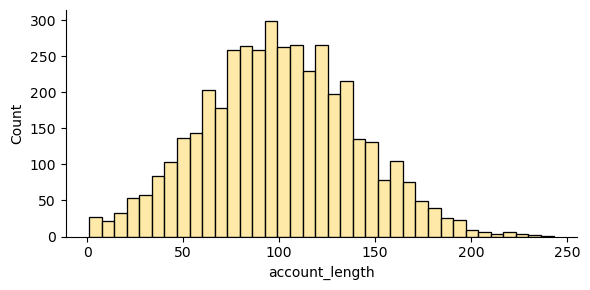

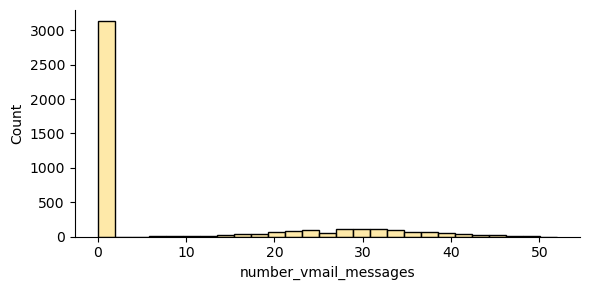

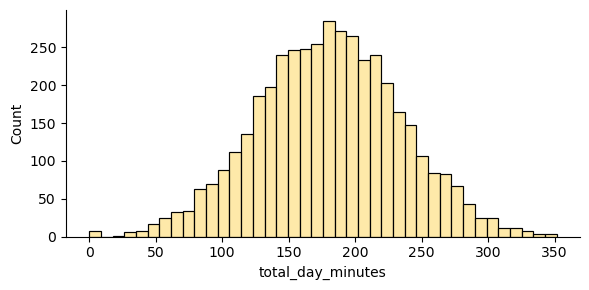

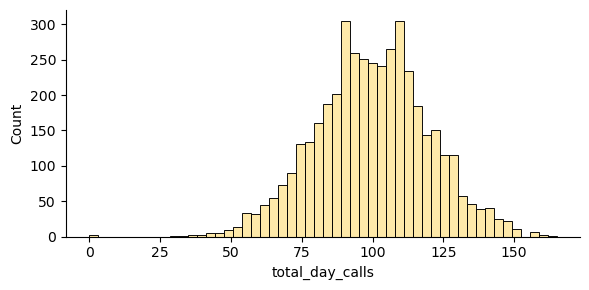

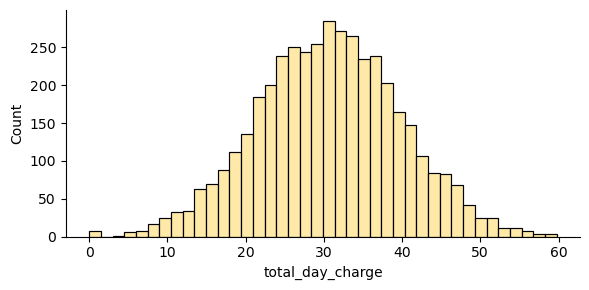

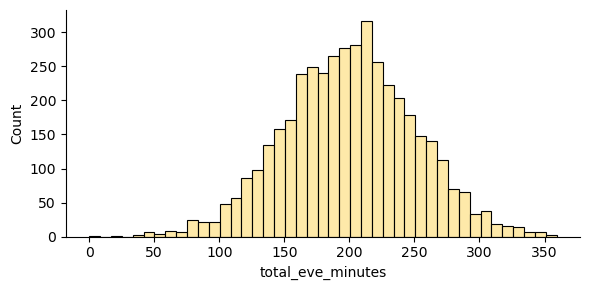

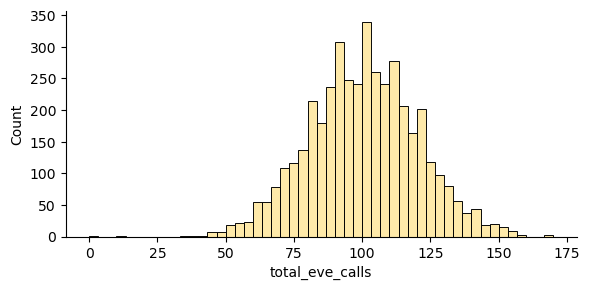

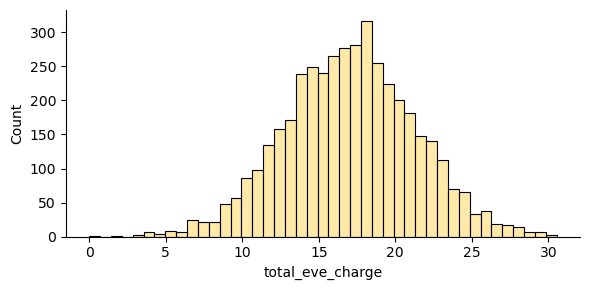

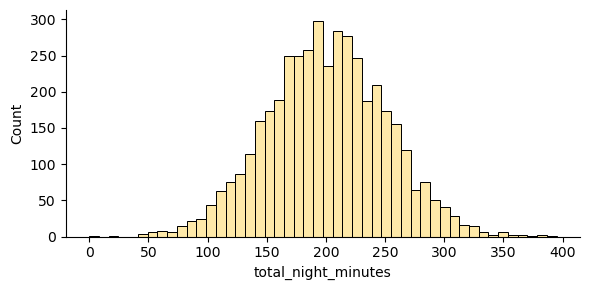

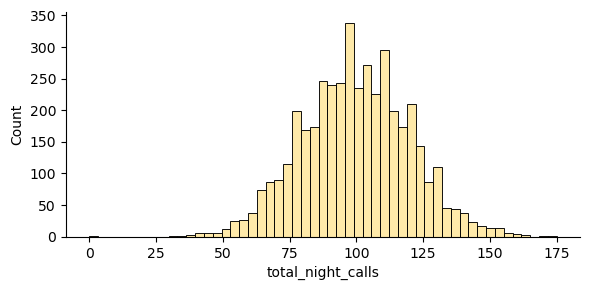

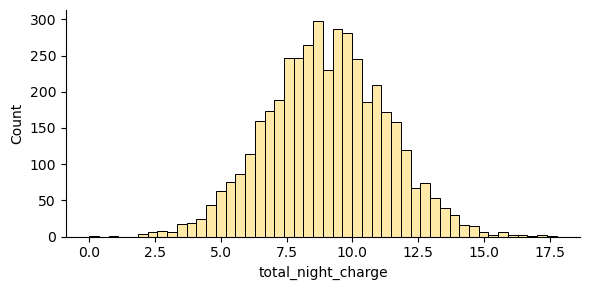

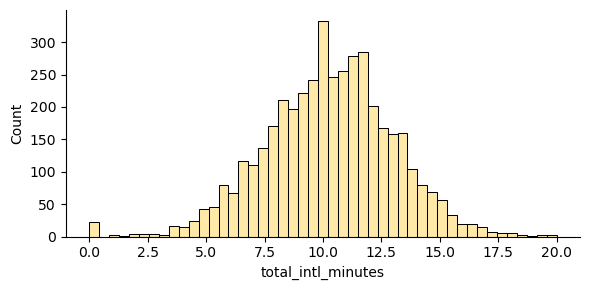

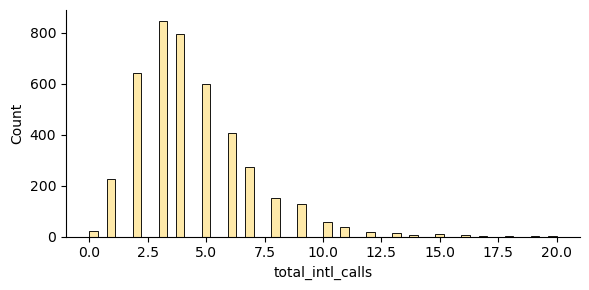

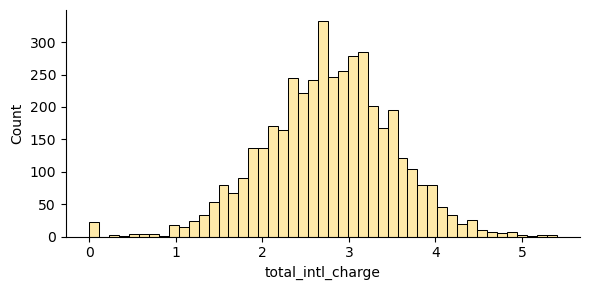

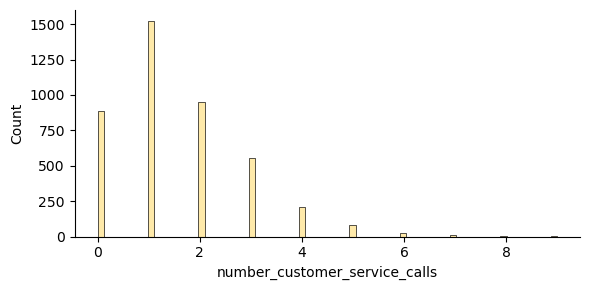

In [8]:
for variable in num_col:
    sns.displot(train_df[variable], color = '#FEE28C', height = 3, aspect = 2)
plt.show()

Visualize categorical variables  <font color=#FFFF00></font>

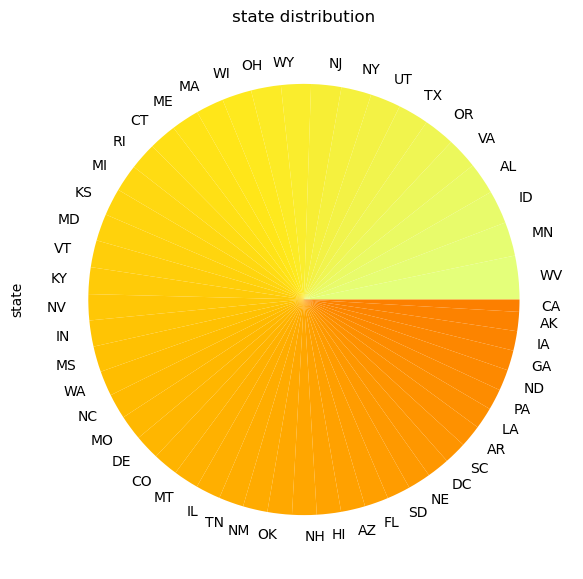

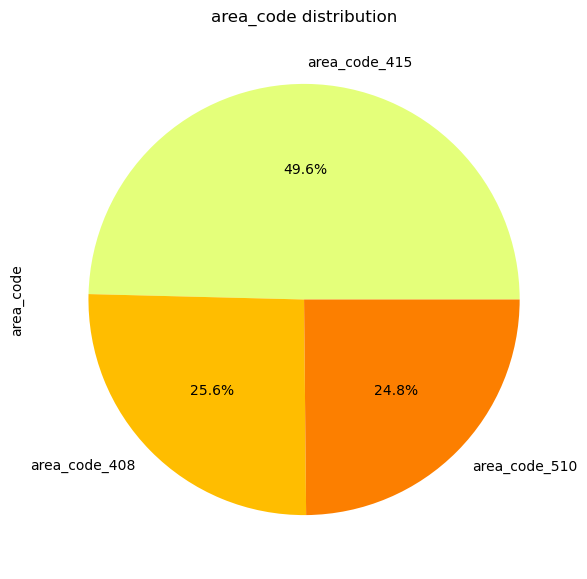

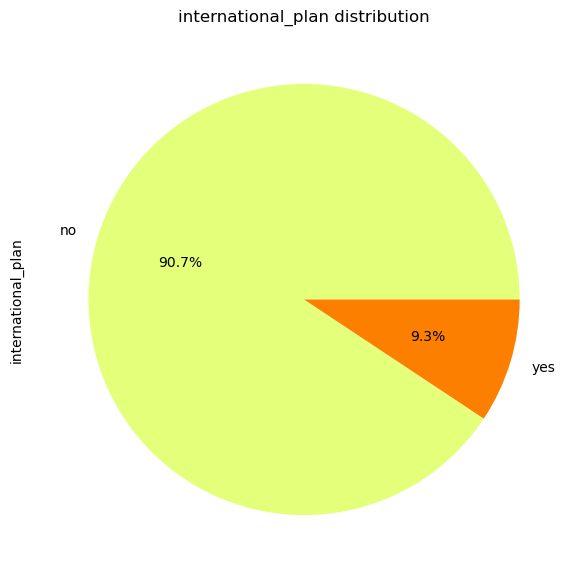

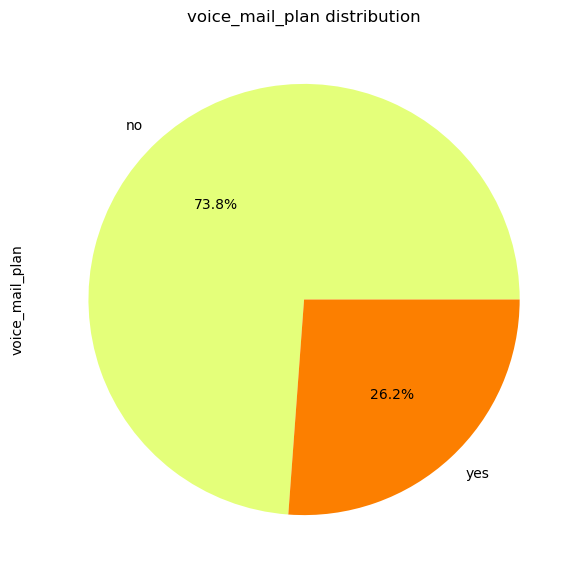

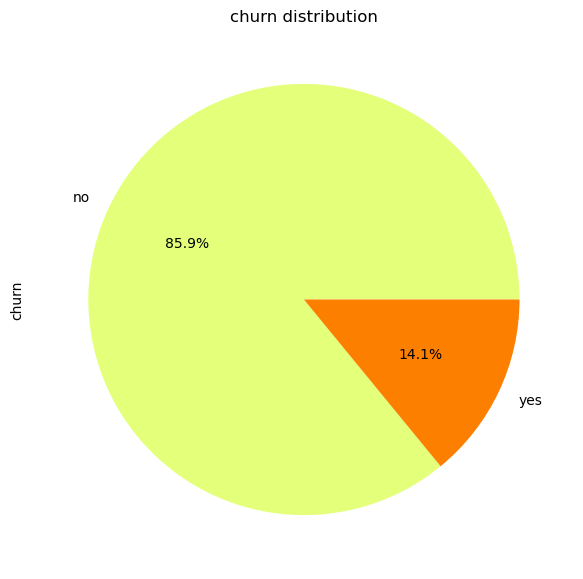

In [9]:
for variable in cat_col:
    if variable != 'state':
        train_df[variable].value_counts().plot(figsize=(7, 7), kind="pie", autopct="%1.1f%%", title = str(variable) + ' distribution', colormap = 'Wistia')
    else:
        train_df[variable].value_counts().plot(figsize=(7, 7), kind="pie", title = str(variable) + ' distribution', colormap = 'Wistia')
    plt.show()

1. Data was collected almost evenly in each state, with no single state occupying a large share of data

2. The majority of users do not use international plan (90.7%) or voice mail plan (73.8%)

3. Only 14.1% users churned as result

## 1.2 Feature Selection and Engineering (Zihan Zhao)

**Outlier detection** <font color=#FFFF00></font>

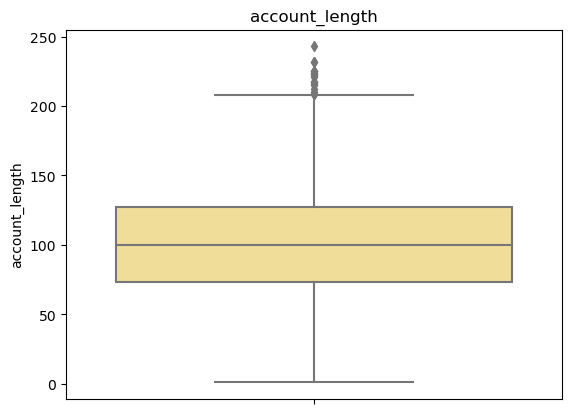

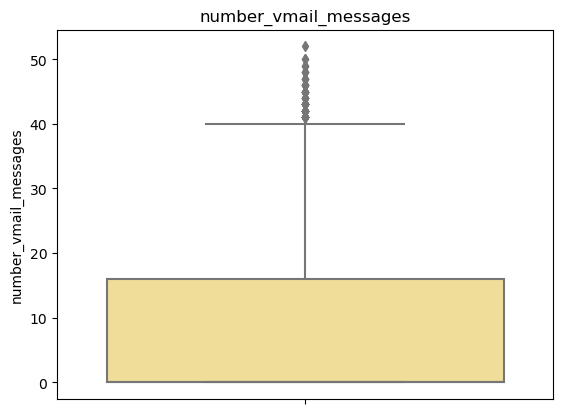

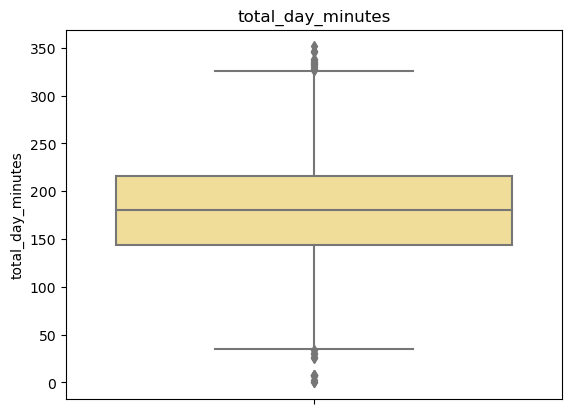

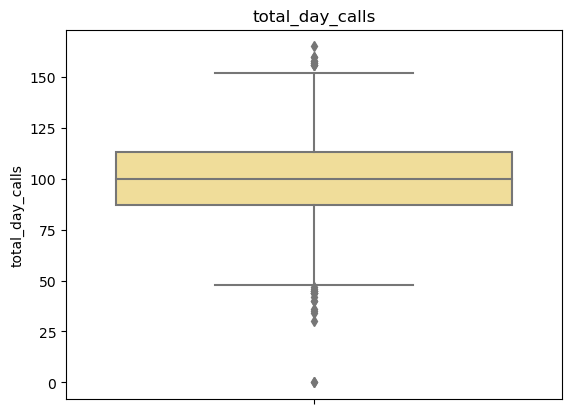

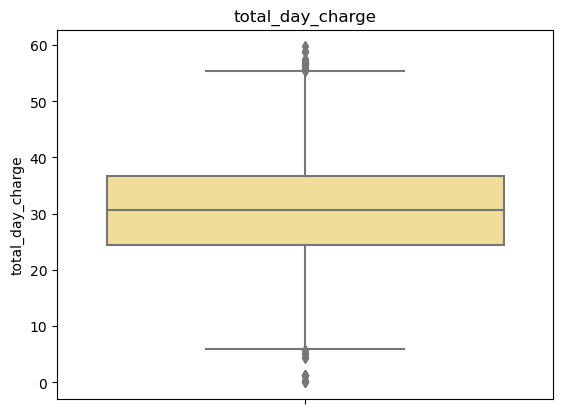

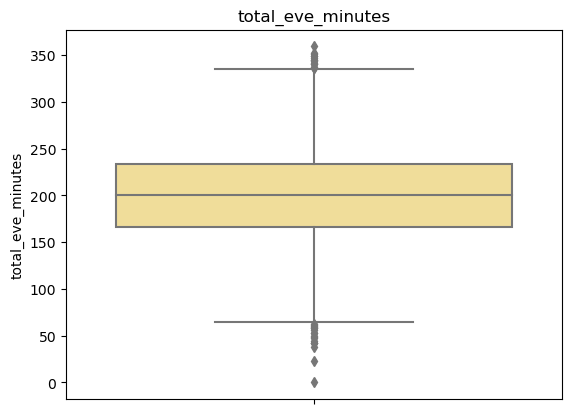

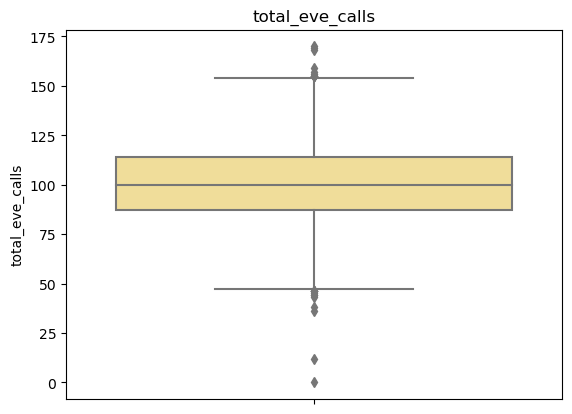

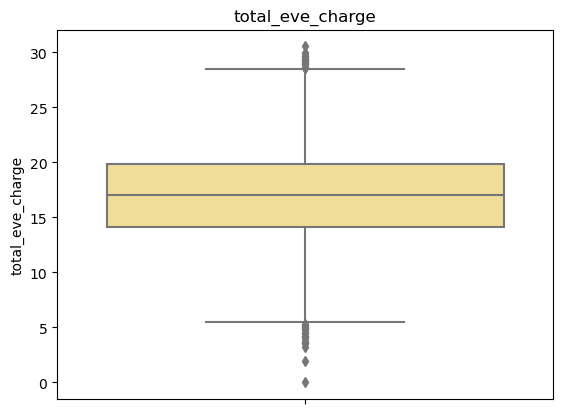

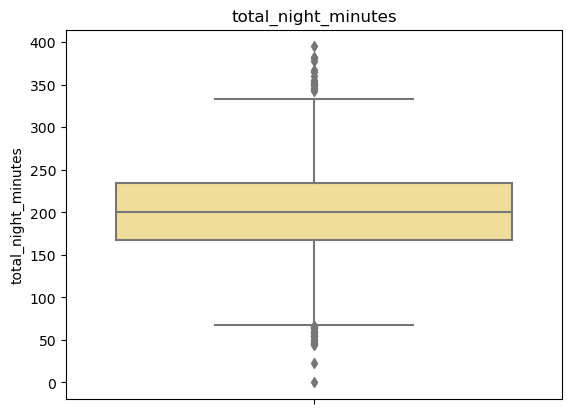

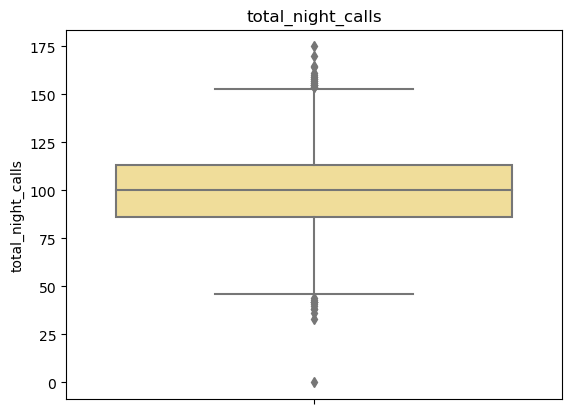

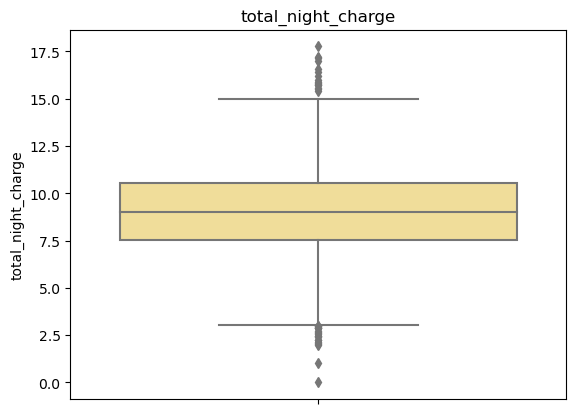

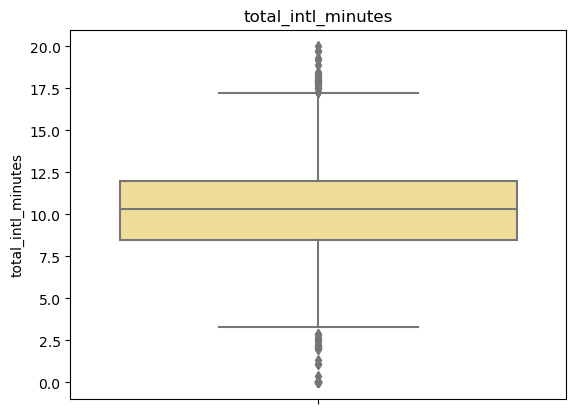

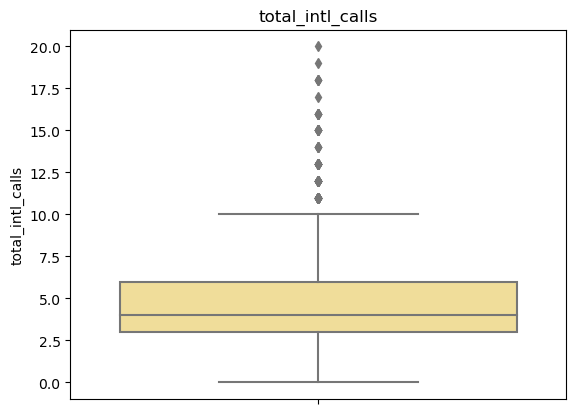

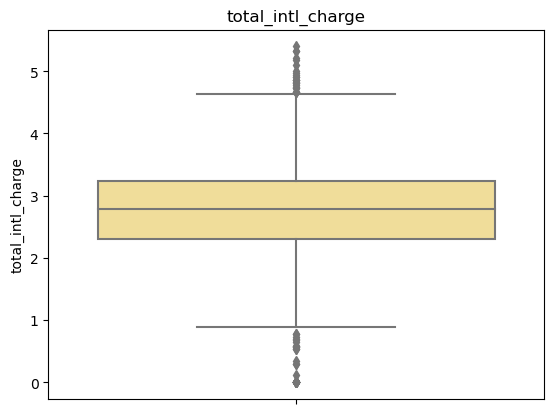

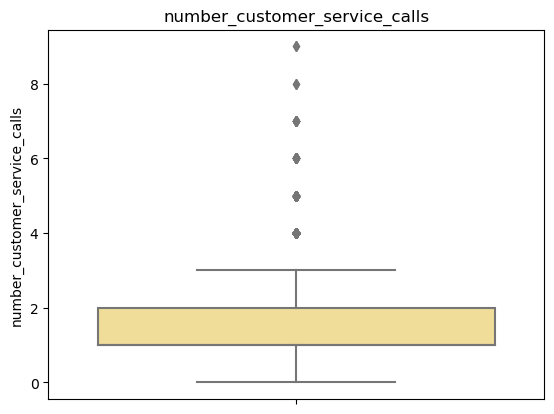

In [10]:
for variable in num_col:
    sns.boxplot(y = variable, data = train_df, color = '#FEE58C')
    plt.title(variable)
    plt.show()

Replace outlier with median value <font color=#FFFF00></font>

In [ ]:
def remove_outliers(df):
    for variable in num_col:
        q1 = df[variable].quantile(0.25)
        q3 = df[variable].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr
        df[variable] = df[variable].mask(df[variable]< lower_bound, df[variable].median(),axis=0)
        df[variable] = df[variable].mask(df[variable]> upper_bound, df[variable].median(),axis=0)
        
remove_outliers(train_df)
train_df.head()

From our experiments, we found that **replacing outliers with median value did not help improve accuracy.** This might be explained by that the extreme values from our data were not errors resulting from measuring, typing, etc. Ignoring them will not help us improve model performance, and we should thus retain them in our dataset.

According to our oberservation, there are 19 variables in total, which includes:
- **15 numercial variables**
- **4 categorical variables**   ['international_plan', 'voice_mail_plan', 'area_code', 'state']

The following code convert categorical data into numerical because sklearn package cannot handle categorical data


In [11]:
def convert_cate_2_num(df):
    le = LabelEncoder()
    
    df.international_plan = le.fit_transform(df.international_plan) 
    df.voice_mail_plan = le.fit_transform(df.voice_mail_plan)
    df.area_code = le.fit_transform(df.area_code)
    le.fit(df['state'])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    df.state = le.fit_transform(df.state)
    try:
        df.churn = le.fit_transform(df.churn)
    except:
        pass


The **rules of convert** are as follow:
- For *international_plan* , *voice_mail_plan* and *churn*  **{0: no  1: yes}**
- For *area_code*  **{0: area_code_408  1: area_code_415  2: area_code_510}**

- For *state*  **{'AK': 0, 'AL': 1, 'AR': 2, ..., 'WI': 48, 'WV': 49, 'WY': 50}**

In [12]:
convert_cate_2_num(train_df)

In [13]:
train_df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,19,121,2,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


**Above shows the result of convertion**

Perform same convertion process in `test_df`

In [14]:
convert_cate_2_num(test_df)

In [15]:
test_df.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,16,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,1,118,2,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,12,62,1,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,46,93,2,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,29,174,1,0,0,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


Use `sns.heatmap()` to show correlations across all variables <font color=#FFFF00></font>

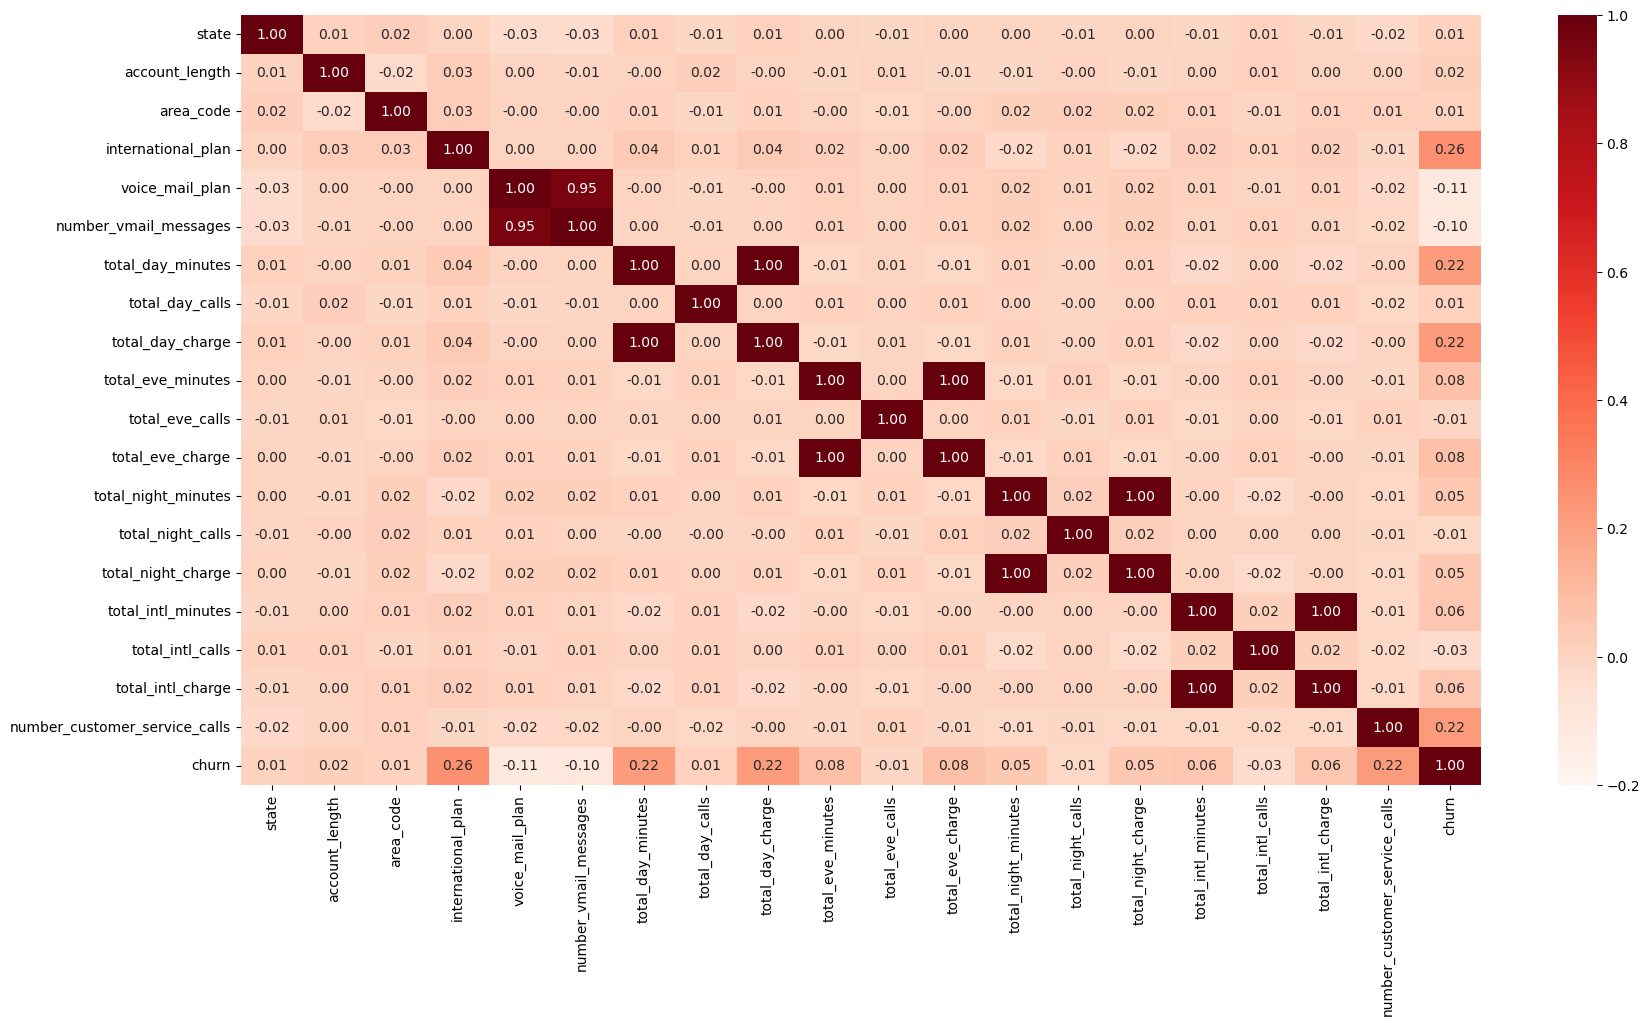

In [16]:
plt.figure(figsize=(20, 10))
sns.heatmap(train_df.corr(), annot=True, fmt= '.2f', cmap='Reds', vmin = -0.2, vmax = 1)
plt.show()

1. Among all factors, whether users have **internation plan has the highest correlation with churn**

2. How much **users pay per day** and **number of calls to customer service** matters as well

3. Whether users have **voice mail plan** seems to be **negatively** correlated with churn

4. There are perfect positive correlations between a few variable pairs (e.g. night minutes and night charge). 
5. Overall, there are **low correlations** between other factors

By observing the heatmap, we found that the current splitting criterion of variables was too specfic that it produced a few variables with repetitive and useless information. Through group discussion, we chose to combine them based on 3 dimensions: **[minutes, calls, charge]**.

In [17]:
def agg(df):
    df['total_net_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
    df['total_net_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']
    df['total_net_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']
    df.drop(columns=['total_day_charge', 'total_eve_charge','total_night_charge',
                'total_day_calls','total_eve_calls', 'total_night_calls', 'total_day_minutes', 
                    'total_eve_minutes', 'total_night_minutes'], inplace=True)

In [18]:
agg(train_df)
train_df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_net_minutes,total_net_calls,total_net_charge
0,35,107,1,0,1,26,13.7,3,3.70,1,0,611.5,329,55.54
1,31,137,1,0,0,0,12.2,5,3.29,0,0,527.2,328,59.00
2,35,84,0,1,0,0,6.6,7,1.78,2,0,558.2,248,65.02
3,36,75,1,1,0,0,10.1,3,2.73,3,0,501.9,356,49.36
4,19,121,2,0,1,24,7.5,7,2.03,3,0,779.3,314,76.28


In [19]:
agg(test_df)
test_df.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_net_minutes,total_net_calls,total_net_charge
0,1,16,128,1,0,1,25,10.0,3,2.70,1,707.2,300,72.86
1,2,1,118,2,1,0,0,6.3,6,1.70,0,647.9,317,65.91
2,3,12,62,1,0,0,0,13.1,6,3.54,4,630.9,245,55.77
3,4,46,93,2,0,0,0,8.1,3,2.19,3,538.5,346,56.80
4,5,29,174,1,0,0,0,15.5,5,4.19,3,652.1,303,55.96


In [20]:
#Get the name of features and target
train_df.columns.to_list()

['state',
 'account_length',
 'area_code',
 'international_plan',
 'voice_mail_plan',
 'number_vmail_messages',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls',
 'churn',
 'total_net_minutes',
 'total_net_calls',
 'total_net_charge']

Here we set feature and target column and use sklearn.model_selection.train_test_split to generate validation data


In [22]:

feature_col = [
'state',
'area_code',
'account_length',
'international_plan',
'voice_mail_plan',
'number_vmail_messages',
'total_intl_minutes',
'total_intl_calls',
'total_intl_charge',
'number_customer_service_calls',
'total_net_minutes',
'total_net_calls',
'total_net_charge']

X = train_df[feature_col]

y = train_df[['churn']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

The porpotion of validation data is set to 20%

In [23]:
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

3400 3400
850 850


## 2.1 (Hantao Xiao)

![sklearn](/Users/adair/Desktop/coding/MACS30100/customer-churn-prediction-2020/sklearn.png "sklearn")

Here we try our first model LinearSVC, based on the sklearn studying guide above

In [24]:
fir_model = LinearSVC(random_state=0)

In this step, we perform GridSearchCV function from sklearn to find the best parameter in model

In [25]:
fir_parameters = {'penalty':('l1', 'l2'), 'loss':['hinge', 'squared_hinge']}
fir_clf = GridSearchCV(fir_model, fir_parameters)
fir_clf.fit(X_train, y_train)

GridSearchCV(estimator=LinearSVC(random_state=0),
             param_grid={'loss': ['hinge', 'squared_hinge'],
                         'penalty': ('l1', 'l2')})

Display the best model parameter

In [26]:
print("Best parameters:", fir_clf.best_params_)
print("Best cross-validation score: {:.2f}".format(fir_clf.best_score_))

Best parameters: {'loss': 'hinge', 'penalty': 'l2'}
Best cross-validation score: 0.86


Equipped with the best parameter we find in the previous step, we are using linearSVC model to perdict the result

In [27]:
fir_model = LinearSVC(loss = 'hinge', penalty = 'l2', random_state=0)
fir_model.fit(X_train, y_train)
prediction = fir_model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, prediction)
print('accuracy: ', accuracy)

accuracy:  0.15294117647058825


For the sake of visualize the result we get, we inplement a matrix function to display the accuracy of our model

In [28]:
def confusion_matrix_plot(X_test , y_test , classifier ,classifier_name):
    ax = metrics.plot_confusion_matrix(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap=plt.cm.Blues)
    return ax.figure_

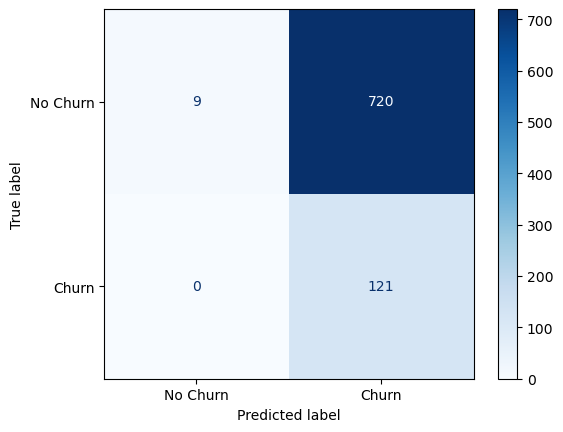

In [29]:
confusion_matrix_plot(X_test , y_test , fir_model , "LinearSVC")

From what we learn ,decision tree model can be capable to handle numerical and categorical data classification. Therefore, similar test would be apply in Decision tree and RandomForest model

In [30]:
Sec_model = DecisionTreeClassifier(random_state=0)

In this step, we perform GridSearchCV function from sklearn to find the best parameter in model

In [31]:
Sec_parameters = {'criterion':('gini', 'entropy'), 'max_features' : ('auto', 'sqrt', 'log2')}
Sec_clf = GridSearchCV(Sec_model, Sec_parameters)
Sec_clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_features': ('auto', 'sqrt', 'log2')})

Display the best model parameter

In [32]:
print("Best parameters:", Sec_clf.best_params_)
print("Best cross-validation score: {:.2f}".format(Sec_clf.best_score_))

Best parameters: {'criterion': 'entropy', 'max_features': 'auto'}
Best cross-validation score: 0.94


Equipped with the best parameter we find in the previous step, we are using DecisionTreeClassifier model to perdict the result

In [33]:
Sec_model = DecisionTreeClassifier(criterion='entropy', max_features='auto',random_state=0)
Sec_model.fit(X_train, y_train)
prediction = Sec_model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, prediction)
print('accuracy: ', accuracy)

accuracy:  0.9364705882352942


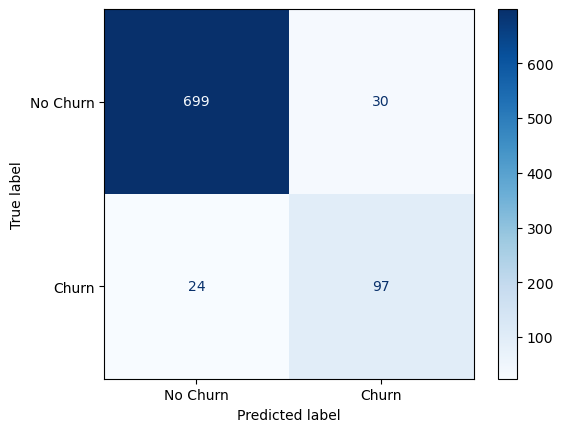

In [34]:
confusion_matrix_plot(X_test , y_test , Sec_model , "DecisionTreeClassifier")

RandomForest

In [35]:
Thi_model = RandomForestClassifier(random_state=0)

GridSearchCV to find the best parameter in model

In [36]:
Thi_parameters = {'criterion':('gini', 'entropy'), 'max_features' : ('auto', 'sqrt', 'log2')}
Thi_clf = GridSearchCV(Thi_model, Thi_parameters)
Thi_clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_features': ('auto', 'sqrt', 'log2')})

Display the best model parameter

In [37]:
print("Best parameters:", Thi_clf.best_params_)
print("Best cross-validation score: {:.2f}".format(Thi_clf.best_score_))

Best parameters: {'criterion': 'gini', 'max_features': 'auto'}
Best cross-validation score: 0.97


Equipped with the best parameter we find in the previous step, we are using RandomForestClassifier model to perdict the result

In [38]:
Thi_model = RandomForestClassifier(criterion='entropy', max_features='auto', random_state=0)
Thi_model.fit(X_train, y_train)
prediction = Thi_model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, prediction)
print('accuracy: ', accuracy)

accuracy:  0.9729411764705882


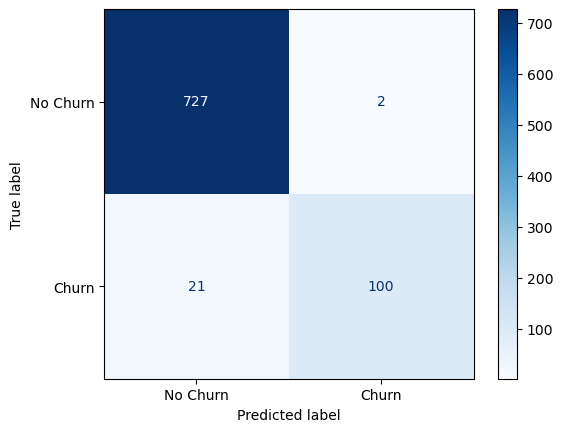

In [39]:
confusion_matrix_plot(X_test , y_test , Thi_model , "RandomForestClassifier")

Here is the comparation of the effect of replacing outliner from the dataset, from which we can realize that the accuracy actually **decrease 5%**. From our standpoint, we believe that it may result from the following reasons:

1. The median value may not accurately represent the underlying data distribution, especially if the data is skewed or has multiple modes.

2. Replacing outliers with the median value can result in loss of important information or patterns in the data that can affect the model's performance.

3. If the outliers are significant, they might be an indicator of important trends or relationships in the data. Replacing them with the median can alter or mask these relationships, leading to less accurate predictions.

In [40]:
num_col = [
'number_vmail_messages',
'total_intl_minutes',
'total_intl_calls',
'total_intl_charge',
'number_customer_service_calls',
'total_net_minutes',
'total_net_calls',
'total_net_charge']

def remove_outliers(df):
    for variable in num_col:
        q1 = df[variable].quantile(0.25)
        q3 = df[variable].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr
        df[variable] = df[variable].mask(df[variable]< lower_bound, df[variable].median(),axis=0)
        df[variable] = df[variable].mask(df[variable]> upper_bound, df[variable].median(),axis=0)
        
remove_outliers(train_df)
train_df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_net_minutes,total_net_calls,total_net_charge
0,35,107,1,0,1,26.0,13.7,3.0,3.70,1.0,0,611.5,329.0,55.54
1,31,137,1,0,0,0.0,12.2,5.0,3.29,0.0,0,527.2,328.0,59.00
2,35,84,0,1,0,0.0,6.6,7.0,1.78,2.0,0,558.2,248.0,65.02
3,36,75,1,1,0,0.0,10.1,3.0,2.73,3.0,0,501.9,356.0,49.36
4,19,121,2,0,1,24.0,7.5,7.0,2.03,3.0,0,779.3,314.0,76.28


In [41]:
feature_col = [
'state',
'area_code',
'international_plan',
'voice_mail_plan',
'number_vmail_messages',
'total_intl_minutes',
'total_intl_calls',
'total_intl_charge',
'number_customer_service_calls',
'total_net_minutes',
'total_net_calls',
'total_net_charge']

X = train_df[feature_col]

y = train_df[['churn']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

accuracy:  0.9411764705882353


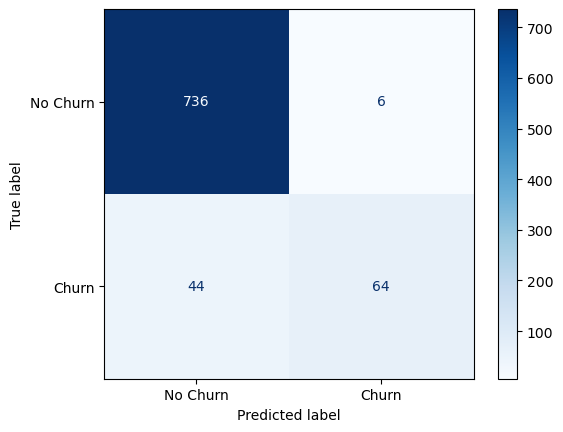

In [42]:
Thi_model = RandomForestClassifier(criterion='entropy', max_features='auto', random_state=0)
Thi_model.fit(X_train, y_train)
prediction = Thi_model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, prediction)
print('accuracy: ', accuracy)

confusion_matrix_plot(X_test , y_test , Thi_model , "RandomForestClassifier")

The function below is to generate output csv, indicating the final result of our model

In [43]:
prediction = Thi_model.predict(test_df[feature_col])

In [44]:
new = []
for i in prediction.tolist():
    if i == 0:
        new.append('no')
    else:
        new.append('yes')

In [45]:
df = pd.DataFrame({
    'id' : list(test_df['id']),
    'churn' : new}, index=None)

df.to_csv('output.csv',index=False)

## Conclusion(Chunyang Zhang)

* After data pre-processing, we use LinearSVC, Decison Tree and Random Foreset to train the model first. 

* Accuracy: Random Foreset > Decison Tree > LinearSVC

* The accuracy gets improved without removing outliers.

* Accuracy gets futher improved based on common sense adjustment--removing feature 'account_length'  from feature_columns

### Future Improvement
* Use better algorithms. For example, GradientBoostingClassifier.

* Add more qulified data

* More related features

* Ask for professionals suggestions
